## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

In [1]:
import json
import requests as req
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import openweathermapy.core as ow
from citipy import citipy

In [2]:
apikey='25bc90a1196e6f153eece0bc0b0fc9eb'
url='http://api.openweathermap.org/data/2.5/weather?'
units='Imperial'
settings = {"units": "Imperial", "appid": apikey}

In [3]:
lat_coord = np.random.uniform(-90,91,650)
lng_coord = np.random.uniform(-180,181,650)

In [4]:
city_df=pd.DataFrame()
city_df['City']=''
city_df['Country Code']=''
city_df['Lat']=''
city_df['Lng']=''
city_df['Max Temp(F)']=''
city_df['Humidity(%)']=''
city_df['Cloudiness (%)']=''
city_df['Wind Speed (mph)']=''

In [5]:
for i in range(len(lat_coord)):
    city_df.set_value(i,'City',citipy.nearest_city(lat_coord[i], lng_coord[i]).city_name.upper())
    city_df.set_value(i,'Country Code',citipy.nearest_city(lat_coord[i],lng_coord[i]).country_code.upper())
    city_df.set_value(i,'Lat',round(lat_coord[i],2))
    city_df.set_value(i,'Lng',round(lng_coord[i],2))

In [6]:
city_df.head()

,City,Country Code,Lat,Lng,Max Temp(F),Humidity(%),Cloudiness (%),Wind Speed (mph)
0,ALBANY,AU,-84.35,103.61,NaN,NaN,NaN,NaN
1,KYTLYM,RU,60.18,58.57,NaN,NaN,NaN,NaN
2,YELLOWKNIFE,CA,86.24,-114.29,NaN,NaN,NaN,NaN
3,BREDASDORP,ZA,-57.12,17.7,NaN,NaN,NaN,NaN
4,SAN PATRICIO,MX,6.3,-110.54,NaN,NaN,NaN,NaN


In [7]:
counter=1

for index, row in city_df.iterrows():
    try:
        weather_data = ow.get_current("{},{}".format(row['City'],row['Country Code']),**settings)

        city_df.set_value(index, 'Max Temp(F)', weather_data('main.temp_max'))
        city_df.set_value(index, 'Humidity(%)', weather_data('main.humidity'))
        city_df.set_value(index, 'Cloudiness (%)', weather_data('clouds.all'))
        city_df.set_value(index, 'Wind Speed (mph)', weather_data('wind.speed'))
        counter=counter+1

    except:
        city_df.set_value(index, 'Max Temp(F)', np.nan)
        city_df.set_value(index, 'Humidity(%)', np.nan)
        city_df.set_value(index, 'Cloudiness (%)', np.nan)
        city_df.set_value(index, 'Wind Speed (mph)', np.nan)
        counter=counter+1
        
city_df=city_df.dropna()        
city_df.head()

,City,Country Code,Lat,Lng,Max Temp(F),Humidity(%),Cloudiness (%),Wind Speed (mph)
0,ALBANY,AU,-84.35,103.61,68.36,67,64,11.43
2,YELLOWKNIFE,CA,86.24,-114.29,-0.41,77,90,4.7
3,BREDASDORP,ZA,-57.12,17.7,69.8,88,92,3.36
4,SAN PATRICIO,MX,6.3,-110.54,78.8,83,75,6.93
5,BUSSELTON,AU,-63.07,100.91,75.11,79,44,15.12


In [8]:
city_df.count()

City                548
Country Code        548
Lat                 548
Lng                 548
Max Temp(F)         548
Humidity(%)         548
Cloudiness (%)      548
Wind Speed (mph)    548
dtype: int64

In [25]:
city_df.to_csv("City Weather Data.csv")

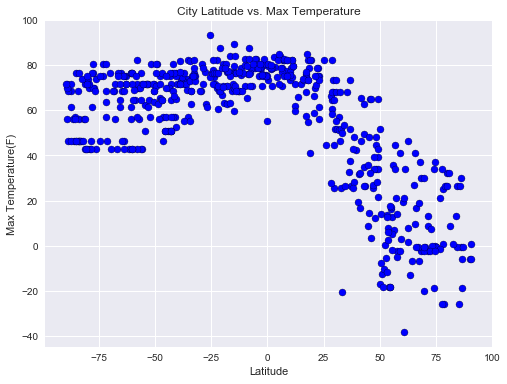

In [49]:
# Temperature (F) vs. Latitude
plt.figure(figsize=(8,6))
plt.scatter(city_df['Lat'], city_df['Max Temp(F)'], facecolors='blue', edgecolors='black', marker="o")
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature(F)')
plt.xlabel('Latitude')
plt.grid(True)
sns.set()
plt.savefig('City Latitude vs. Max Temperature.png')
plt.show()

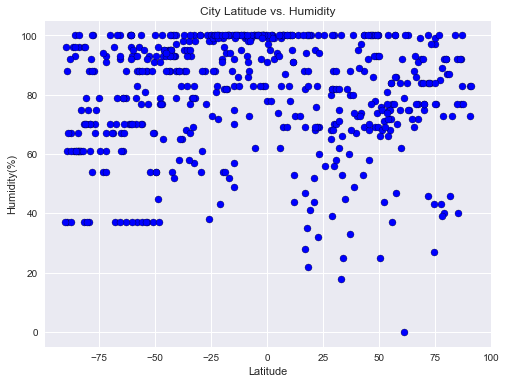

In [50]:
# Humidity (%) vs. Latitude
plt.figure(figsize=(8,6))
plt.scatter(city_df['Lat'], city_df['Humidity(%)'], facecolors='blue', edgecolors='black', marker="o")
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.grid(True)
sns.set()
plt.savefig('City Latitude vs. Humidity.png')
plt.show()

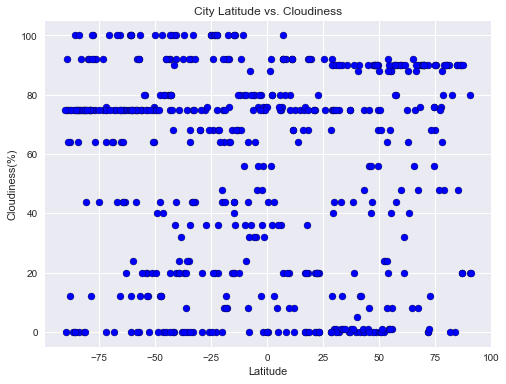

In [51]:
# Cloudiness (%) vs. Latitude
plt.figure(figsize=(8,6))
plt.scatter(city_df['Lat'], city_df['Cloudiness (%)'], facecolors='blue', edgecolors='black', marker="o")
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.grid(True)
sns.set()
plt.savefig('City Latitude vs. Cloudiness.png')
plt.show()

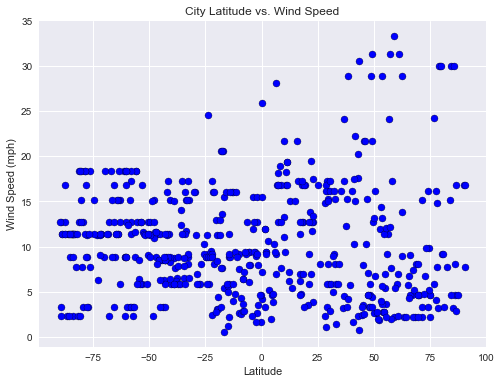

In [52]:
# Wind Speed (mph) vs. Latitude
plt.figure(figsize=(8,6))
plt.scatter(city_df['Lat'], city_df['Wind Speed (mph)'], facecolors='blue', edgecolors='black', marker="o")
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
sns.set()
plt.savefig('City Latitude vs. Wind Speed.png')
plt.show()